In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Î∂ÄÏÇ∞ÏßÑÍµ¨"
region_code = "8"
target_date = "2019-01-03"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2019_1q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2019-01-03   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7837   Î∂ÄÏÇ∞ÏßÑÍµ¨   7837   Î∂ÄÏÇ∞ÏßÑÍµ¨   
1   2019-01-03     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   5818   Î∂ÄÏÇ∞ÏßÑÍµ¨   5818   Î∂ÄÏÇ∞ÏßÑÍµ¨   
2   2019-01-03    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   3737   Î∂ÄÏÇ∞ÏßÑÍµ¨   3737   Î∂ÄÏÇ∞ÏßÑÍµ¨   
3   2019-01-03     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2690   Î∂ÄÏÇ∞ÏßÑÍµ¨   2690   Î∂ÄÏÇ∞ÏßÑÍµ¨   
4   2019-01-03    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   8990   Î∂ÄÏÇ∞ÏßÑÍµ¨   8990   Î∂ÄÏÇ∞ÏßÑÍµ¨   
5   2019-01-03     ÎåÄÌåå                      1.0„éè   3500   Î∂ÄÏÇ∞ÏßÑÍµ¨   3500   Î∂ÄÏÇ∞ÏßÑÍµ¨   
6   2019-01-03   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  12250   Î∂ÄÏÇ∞ÏßÑÍµ¨  12250   Î∂ÄÏÇ∞ÏßÑÍµ¨   
7   2019-01-03     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4365   Î∂ÄÏÇ∞ÏßÑÍµ¨   4365   Î∂ÄÏÇ∞ÏßÑÍµ¨   
8   2019-01-03     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676   Î∂ÄÏÇ∞ÏßÑÍµ¨    676   Î∂ÄÏÇ∞ÏßÑÍµ¨   
9   2019-01-03     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1400   Î∂ÄÏÇ∞ÏßÑÍµ¨   1400   Î∂ÄÏÇ∞ÏßÑÍµ¨   
10  2019-01-03      Î¨¥                   2.0„éè 1Í∞ú   2253   Î∂ÄÏÇ∞ÏßÑÍµ¨   2253   Î∂ÄÏÇ∞ÏßÑÍµ¨   
11  2019-01-03    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   
12  2019-01-03     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   3711   Î∂ÄÏÇ∞ÏßÑÍµ¨   3711   Î∂ÄÏÇ∞ÏßÑÍµ¨   
13  2019-01-03      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  14900   Î∂ÄÏÇ∞ÏßÑÍµ¨  14900   Î∂ÄÏÇ∞ÏßÑÍµ¨   
14  2019-01-03     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2590   Î∂ÄÏÇ∞ÏßÑÍµ¨   2590   Î∂ÄÏÇ∞ÏßÑÍµ¨   
15  2019-01-03  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3995   Î∂ÄÏÇ∞ÏßÑÍµ¨   3995   Î∂ÄÏÇ∞ÏßÑÍµ¨   
16  2019-01-03   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13900   Î∂ÄÏÇ∞ÏßÑÍµ¨  13900   Î∂ÄÏÇ∞ÏßÑÍµ¨   
17  2019-01-03     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  25692   Î∂ÄÏÇ∞ÏßÑÍµ¨  25692   Î∂ÄÏÇ∞ÏßÑÍµ¨   
18  2019-01-03    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2450   Î∂ÄÏÇ∞ÏßÑÍµ¨   2450   Î∂ÄÏÇ∞ÏßÑÍµ¨   
19  2019-01-03     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580   Î∂ÄÏÇ∞ÏßÑÍµ¨   1580   Î∂ÄÏÇ∞ÏßÑÍµ¨   
20  2019-01-03     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190   Î∂ÄÏÇ∞ÏßÑÍµ¨   1190   Î∂ÄÏÇ∞ÏßÑÍµ¨   
21  2019-01-03    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  34950   Î∂ÄÏÇ∞ÏßÑÍµ¨  34950   Î∂ÄÏÇ∞ÏßÑÍµ¨   
22  2019-01-03    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   5040   Î∂ÄÏÇ∞ÏßÑÍµ¨   5040   Î∂ÄÏÇ∞ÏßÑÍµ¨   
23  2019-01-03      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  51900   Î∂ÄÏÇ∞ÏßÑÍµ¨  51900   Î∂ÄÏÇ∞ÏßÑÍµ¨   
24  2019-01-03     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1330   Î∂ÄÏÇ∞ÏßÑÍµ¨   1330   Î∂ÄÏÇ∞ÏßÑÍµ¨   
25  2019-01-03     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    796   Î∂ÄÏÇ∞ÏßÑÍµ¨    796   Î∂ÄÏÇ∞ÏßÑÍµ¨   
26  2019-01-03    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   7290   Î∂ÄÏÇ∞ÏßÑÍµ¨   7290   Î∂ÄÏÇ∞ÏßÑÍµ¨   
27  2019-01-03   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   
28  2019-01-03     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   3130   Î∂ÄÏÇ∞ÏßÑÍµ¨   3130   Î∂ÄÏÇ∞ÏßÑÍµ¨   
29  2019-01-03    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  24900   Î∂ÄÏÇ∞ÏßÑÍµ¨  24900   Î∂ÄÏÇ∞ÏßÑÍµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0      0    0.0%   7,837  
1      0    0.0%   5,818  
2      0    0.0%   3,737  
3      0    0.0%   2,690  
4      0    0.0%   8,990  
5      0    0.0%   3,500  
6      0    0.0%  12,250  
7      0    0.0%   4,365  
8      0    0.0%     676  
9      0    0.0%   1,400  
10     0    0.0%   2,253  
11     0    0.0%   3,290  
12     0    0.0%   3,711  
13     0    0.0%  14,900  
14     0    0.0%   2,590  
15     0    0.0%   3,995  
16     0    0.0%  13,900  
17     0    0.0%  25,692 

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Î∂ÄÏÇ∞ÏßÑÍµ¨"
region_code = "8"
target_date = "2019-04-04"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2019_2q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2019-04-04   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7087   Î∂ÄÏÇ∞ÏßÑÍµ¨   7087   Î∂ÄÏÇ∞ÏßÑÍµ¨   
1   2019-04-04     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   5818   Î∂ÄÏÇ∞ÏßÑÍµ¨   5818   Î∂ÄÏÇ∞ÏßÑÍµ¨   
2   2019-04-04    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   4987   Î∂ÄÏÇ∞ÏßÑÍµ¨   4987   Î∂ÄÏÇ∞ÏßÑÍµ¨   
3   2019-04-04     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2690   Î∂ÄÏÇ∞ÏßÑÍµ¨   2690   Î∂ÄÏÇ∞ÏßÑÍµ¨   
4   2019-04-04    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   8085   Î∂ÄÏÇ∞ÏßÑÍµ¨   8085   Î∂ÄÏÇ∞ÏßÑÍµ¨   
5   2019-04-04     ÎåÄÌåå                      1.0„éè   2300   Î∂ÄÏÇ∞ÏßÑÍµ¨   2300   Î∂ÄÏÇ∞ÏßÑÍµ¨   
6   2019-04-04   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  14250   Î∂ÄÏÇ∞ÏßÑÍµ¨  14250   Î∂ÄÏÇ∞ÏßÑÍµ¨   
7   2019-04-04     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4531   Î∂ÄÏÇ∞ÏßÑÍµ¨   4531   Î∂ÄÏÇ∞ÏßÑÍµ¨   
8   2019-04-04     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676   Î∂ÄÏÇ∞ÏßÑÍµ¨    676   Î∂ÄÏÇ∞ÏßÑÍµ¨   
9   2019-04-04     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1400   Î∂ÄÏÇ∞ÏßÑÍµ¨   1400   Î∂ÄÏÇ∞ÏßÑÍµ¨   
10  2019-04-04      Î¨¥                   2.0„éè 1Í∞ú   2580   Î∂ÄÏÇ∞ÏßÑÍµ¨   2580   Î∂ÄÏÇ∞ÏßÑÍµ¨   
11  2019-04-04    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   
12  2019-04-04     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   7770   Î∂ÄÏÇ∞ÏßÑÍµ¨   7770   Î∂ÄÏÇ∞ÏßÑÍµ¨   
13  2019-04-04      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  19981   Î∂ÄÏÇ∞ÏßÑÍµ¨  19981   Î∂ÄÏÇ∞ÏßÑÍµ¨   
14  2019-04-04     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2490   Î∂ÄÏÇ∞ÏßÑÍµ¨   2490   Î∂ÄÏÇ∞ÏßÑÍµ¨   
15  2019-04-04  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3995   Î∂ÄÏÇ∞ÏßÑÍµ¨   3995   Î∂ÄÏÇ∞ÏßÑÍµ¨   
16  2019-04-04   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  10900   Î∂ÄÏÇ∞ÏßÑÍµ¨  10900   Î∂ÄÏÇ∞ÏßÑÍµ¨   
17  2019-04-04     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  23550   Î∂ÄÏÇ∞ÏßÑÍµ¨  23550   Î∂ÄÏÇ∞ÏßÑÍµ¨   
18  2019-04-04    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2690   Î∂ÄÏÇ∞ÏßÑÍµ¨   2690   Î∂ÄÏÇ∞ÏßÑÍµ¨   
19  2019-04-04     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1680   Î∂ÄÏÇ∞ÏßÑÍµ¨   1680   Î∂ÄÏÇ∞ÏßÑÍµ¨   
20  2019-04-04     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190   Î∂ÄÏÇ∞ÏßÑÍµ¨   1190   Î∂ÄÏÇ∞ÏßÑÍµ¨   
21  2019-04-04    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  47450   Î∂ÄÏÇ∞ÏßÑÍµ¨  47450   Î∂ÄÏÇ∞ÏßÑÍµ¨   
22  2019-04-04    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   5990   Î∂ÄÏÇ∞ÏßÑÍµ¨   5990   Î∂ÄÏÇ∞ÏßÑÍµ¨   
23  2019-04-04      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  49900   Î∂ÄÏÇ∞ÏßÑÍµ¨  49900   Î∂ÄÏÇ∞ÏßÑÍµ¨   
24  2019-04-04     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1648   Î∂ÄÏÇ∞ÏßÑÍµ¨   1648   Î∂ÄÏÇ∞ÏßÑÍµ¨   
25  2019-04-04     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    796   Î∂ÄÏÇ∞ÏßÑÍµ¨    796   Î∂ÄÏÇ∞ÏßÑÍµ¨   
26  2019-04-04    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   7290   Î∂ÄÏÇ∞ÏßÑÍµ¨   7290   Î∂ÄÏÇ∞ÏßÑÍµ¨   
27  2019-04-04   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   
28  2019-04-04     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   3130   Î∂ÄÏÇ∞ÏßÑÍµ¨   3130   Î∂ÄÏÇ∞ÏßÑÍµ¨   
29  2019-04-04    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  18900   Î∂ÄÏÇ∞ÏßÑÍµ¨  18900   Î∂ÄÏÇ∞ÏßÑÍµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0      0    0.0%   7,087  
1      0    0.0%   5,818  
2      0    0.0%   4,987  
3      0    0.0%   2,690  
4      0    0.0%   8,085  
5      0    0.0%   2,300  
6      0    0.0%  14,250  
7      0    0.0%   4,531  
8      0    0.0%     676  
9      0    0.0%   1,400  
10     0    0.0%   2,580  
11     0    0.0%   3,290  
12     0    0.0%   7,770  
13     0    0.0%  19,981  
14     0    0.0%   2,490  
15     0    0.0%   3,995  
16     0    0.0%  10,900  
17     0    0.0%  23,550 

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Î∂ÄÏÇ∞ÏßÑÍµ¨"
region_code = "8"
target_date = "2019-07-11"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2019_3q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2019-07-11   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   5962   Î∂ÄÏÇ∞ÏßÑÍµ¨   5962   Î∂ÄÏÇ∞ÏßÑÍµ¨   
1   2019-07-11     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   5818   Î∂ÄÏÇ∞ÏßÑÍµ¨   5818   Î∂ÄÏÇ∞ÏßÑÍµ¨   
2   2019-07-11     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)   8267   Î∂ÄÏÇ∞ÏßÑÍµ¨   8267   Î∂ÄÏÇ∞ÏßÑÍµ¨   
3   2019-07-11    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   4000   Î∂ÄÏÇ∞ÏßÑÍµ¨   4000   Î∂ÄÏÇ∞ÏßÑÍµ¨   
4   2019-07-11     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2690   Î∂ÄÏÇ∞ÏßÑÍµ¨   2690   Î∂ÄÏÇ∞ÏßÑÍµ¨   
5   2019-07-11    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   7990   Î∂ÄÏÇ∞ÏßÑÍµ¨   7990   Î∂ÄÏÇ∞ÏßÑÍµ¨   
6   2019-07-11     ÎåÄÌåå                      1.0„éè   2590   Î∂ÄÏÇ∞ÏßÑÍµ¨   2590   Î∂ÄÏÇ∞ÏßÑÍµ¨   
7   2019-07-11   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  13450   Î∂ÄÏÇ∞ÏßÑÍµ¨  13450   Î∂ÄÏÇ∞ÏßÑÍµ¨   
8   2019-07-11     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4531   Î∂ÄÏÇ∞ÏßÑÍµ¨   4531   Î∂ÄÏÇ∞ÏßÑÍµ¨   
9   2019-07-11     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676   Î∂ÄÏÇ∞ÏßÑÍµ¨    676   Î∂ÄÏÇ∞ÏßÑÍµ¨   
10  2019-07-11     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1400   Î∂ÄÏÇ∞ÏßÑÍµ¨   1400   Î∂ÄÏÇ∞ÏßÑÍµ¨   
11  2019-07-11      Î¨¥                   2.0„éè 1Í∞ú   1986   Î∂ÄÏÇ∞ÏßÑÍµ¨   1986   Î∂ÄÏÇ∞ÏßÑÍµ¨   
12  2019-07-11    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   
13  2019-07-11     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú  10000   Î∂ÄÏÇ∞ÏßÑÍµ¨  10000   Î∂ÄÏÇ∞ÏßÑÍµ¨   
14  2019-07-11      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  32475   Î∂ÄÏÇ∞ÏßÑÍµ¨  32475   Î∂ÄÏÇ∞ÏßÑÍµ¨   
15  2019-07-11     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2490   Î∂ÄÏÇ∞ÏßÑÍµ¨   2490   Î∂ÄÏÇ∞ÏßÑÍµ¨   
16  2019-07-11  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   6930   Î∂ÄÏÇ∞ÏßÑÍµ¨   6930   Î∂ÄÏÇ∞ÏßÑÍµ¨   
17  2019-07-11   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13990   Î∂ÄÏÇ∞ÏßÑÍµ¨  13990   Î∂ÄÏÇ∞ÏßÑÍµ¨   
18  2019-07-11     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  23550   Î∂ÄÏÇ∞ÏßÑÍµ¨  23550   Î∂ÄÏÇ∞ÏßÑÍµ¨   
19  2019-07-11    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2690   Î∂ÄÏÇ∞ÏßÑÍµ¨   2690   Î∂ÄÏÇ∞ÏßÑÍµ¨   
20  2019-07-11     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1680   Î∂ÄÏÇ∞ÏßÑÍµ¨   1680   Î∂ÄÏÇ∞ÏßÑÍµ¨   
21  2019-07-11     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190   Î∂ÄÏÇ∞ÏßÑÍµ¨   1190   Î∂ÄÏÇ∞ÏßÑÍµ¨   
22  2019-07-11    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  47450   Î∂ÄÏÇ∞ÏßÑÍµ¨  47450   Î∂ÄÏÇ∞ÏßÑÍµ¨   
23  2019-07-11    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   7188   Î∂ÄÏÇ∞ÏßÑÍµ¨   7188   Î∂ÄÏÇ∞ÏßÑÍµ¨   
24  2019-07-11      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  47900   Î∂ÄÏÇ∞ÏßÑÍµ¨  47900   Î∂ÄÏÇ∞ÏßÑÍµ¨   
25  2019-07-11     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1438   Î∂ÄÏÇ∞ÏßÑÍµ¨   1438   Î∂ÄÏÇ∞ÏßÑÍµ¨   
26  2019-07-11    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   7462   Î∂ÄÏÇ∞ÏßÑÍµ¨   7462   Î∂ÄÏÇ∞ÏßÑÍµ¨   
27  2019-07-11     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    796   Î∂ÄÏÇ∞ÏßÑÍµ¨    796   Î∂ÄÏÇ∞ÏßÑÍµ¨   
28  2019-07-11    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   7290   Î∂ÄÏÇ∞ÏßÑÍµ¨   7290   Î∂ÄÏÇ∞ÏßÑÍµ¨   
29  2019-07-11   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   
30  2019-07-11     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2490   Î∂ÄÏÇ∞ÏßÑÍµ¨   2490   Î∂ÄÏÇ∞ÏßÑÍµ¨   
31  2019-07-11    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  17900   Î∂ÄÏÇ∞ÏßÑÍµ¨  17900   Î∂ÄÏÇ∞ÏßÑÍµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0      0    0.0%   5,962  
1      0    0.0%   5,818  
2      0    0.0%   8,267  
3      0    0.0%   4,000  
4      0    0.0%   2,690  
5      0    0.0%   7,990  
6      0    0.0%   2,590  
7      0    0.0%  13,450  
8      0    0.0%   4,531  
9      0    0.0% 

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Î∂ÄÏÇ∞ÏßÑÍµ¨"
region_code = "8"
target_date = "2019-10-10"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2019_4q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2019-10-10   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   6675   Î∂ÄÏÇ∞ÏßÑÍµ¨   6675   Î∂ÄÏÇ∞ÏßÑÍµ¨   
1   2019-10-10     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6347   Î∂ÄÏÇ∞ÏßÑÍµ¨   6347   Î∂ÄÏÇ∞ÏßÑÍµ¨   
2   2019-10-10     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)  10692   Î∂ÄÏÇ∞ÏßÑÍµ¨  10692   Î∂ÄÏÇ∞ÏßÑÍµ¨   
3   2019-10-10    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   3315   Î∂ÄÏÇ∞ÏßÑÍµ¨   3315   Î∂ÄÏÇ∞ÏßÑÍµ¨   
4   2019-10-10     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2690   Î∂ÄÏÇ∞ÏßÑÍµ¨   2690   Î∂ÄÏÇ∞ÏßÑÍµ¨   
5   2019-10-10    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   6490   Î∂ÄÏÇ∞ÏßÑÍµ¨   6490   Î∂ÄÏÇ∞ÏßÑÍµ¨   
6   2019-10-10     ÎåÄÌåå                      1.0„éè   3790   Î∂ÄÏÇ∞ÏßÑÍµ¨   3790   Î∂ÄÏÇ∞ÏßÑÍµ¨   
7   2019-10-10   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  12450   Î∂ÄÏÇ∞ÏßÑÍµ¨  12450   Î∂ÄÏÇ∞ÏßÑÍµ¨   
8   2019-10-10     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4531   Î∂ÄÏÇ∞ÏßÑÍµ¨   4531   Î∂ÄÏÇ∞ÏßÑÍµ¨   
9   2019-10-10     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676   Î∂ÄÏÇ∞ÏßÑÍµ¨    676   Î∂ÄÏÇ∞ÏßÑÍµ¨   
10  2019-10-10     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1400   Î∂ÄÏÇ∞ÏßÑÍµ¨   1400   Î∂ÄÏÇ∞ÏßÑÍµ¨   
11  2019-10-10      Î¨¥                   2.0„éè 1Í∞ú   3320   Î∂ÄÏÇ∞ÏßÑÍµ¨   3320   Î∂ÄÏÇ∞ÏßÑÍµ¨   
12  2019-10-10    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   
13  2019-10-10     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   5550   Î∂ÄÏÇ∞ÏßÑÍµ¨   5550   Î∂ÄÏÇ∞ÏßÑÍµ¨   
14  2019-10-10      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  17980   Î∂ÄÏÇ∞ÏßÑÍµ¨  17980   Î∂ÄÏÇ∞ÏßÑÍµ¨   
15  2019-10-10     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   5990   Î∂ÄÏÇ∞ÏßÑÍµ¨   5990   Î∂ÄÏÇ∞ÏßÑÍµ¨   
16  2019-10-10  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   6930   Î∂ÄÏÇ∞ÏßÑÍµ¨   6930   Î∂ÄÏÇ∞ÏßÑÍµ¨   
17  2019-10-10   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13900   Î∂ÄÏÇ∞ÏßÑÍµ¨  13900   Î∂ÄÏÇ∞ÏßÑÍµ¨   
18  2019-10-10     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  21407   Î∂ÄÏÇ∞ÏßÑÍµ¨  21407   Î∂ÄÏÇ∞ÏßÑÍµ¨   
19  2019-10-10    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2690   Î∂ÄÏÇ∞ÏßÑÍµ¨   2690   Î∂ÄÏÇ∞ÏßÑÍµ¨   
20  2019-10-10     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1680   Î∂ÄÏÇ∞ÏßÑÍµ¨   1680   Î∂ÄÏÇ∞ÏßÑÍµ¨   
21  2019-10-10     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190   Î∂ÄÏÇ∞ÏßÑÍµ¨   1190   Î∂ÄÏÇ∞ÏßÑÍµ¨   
22  2019-10-10    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  47450   Î∂ÄÏÇ∞ÏßÑÍµ¨  47450   Î∂ÄÏÇ∞ÏßÑÍµ¨   
23  2019-10-10    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   7188   Î∂ÄÏÇ∞ÏßÑÍµ¨   7188   Î∂ÄÏÇ∞ÏßÑÍµ¨   
24  2019-10-10      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  49900   Î∂ÄÏÇ∞ÏßÑÍµ¨  49900   Î∂ÄÏÇ∞ÏßÑÍµ¨   
25  2019-10-10     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1327   Î∂ÄÏÇ∞ÏßÑÍµ¨   1327   Î∂ÄÏÇ∞ÏßÑÍµ¨   
26  2019-10-10    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   5180   Î∂ÄÏÇ∞ÏßÑÍµ¨   5180   Î∂ÄÏÇ∞ÏßÑÍµ¨   
27  2019-10-10     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    796   Î∂ÄÏÇ∞ÏßÑÍµ¨    796   Î∂ÄÏÇ∞ÏßÑÍµ¨   
28  2019-10-10    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   7290   Î∂ÄÏÇ∞ÏßÑÍµ¨   7290   Î∂ÄÏÇ∞ÏßÑÍµ¨   
29  2019-10-10   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   3290   Î∂ÄÏÇ∞ÏßÑÍµ¨   
30  2019-10-10     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   3130   Î∂ÄÏÇ∞ÏßÑÍµ¨   3130   Î∂ÄÏÇ∞ÏßÑÍµ¨   
31  2019-10-10    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  24900   Î∂ÄÏÇ∞ÏßÑÍµ¨  24900   Î∂ÄÏÇ∞ÏßÑÍµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0      0    0.0%   6,675  
1      0    0.0%   6,347  
2      0    0.0%  10,692  
3      0    0.0%   3,315  
4      0    0.0%   2,690  
5      0    0.0%   6,490  
6      0    0.0%   3,790  
7      0    0.0%  12,450  
8      0    0.0%   4,531  
9      0    0.0% 

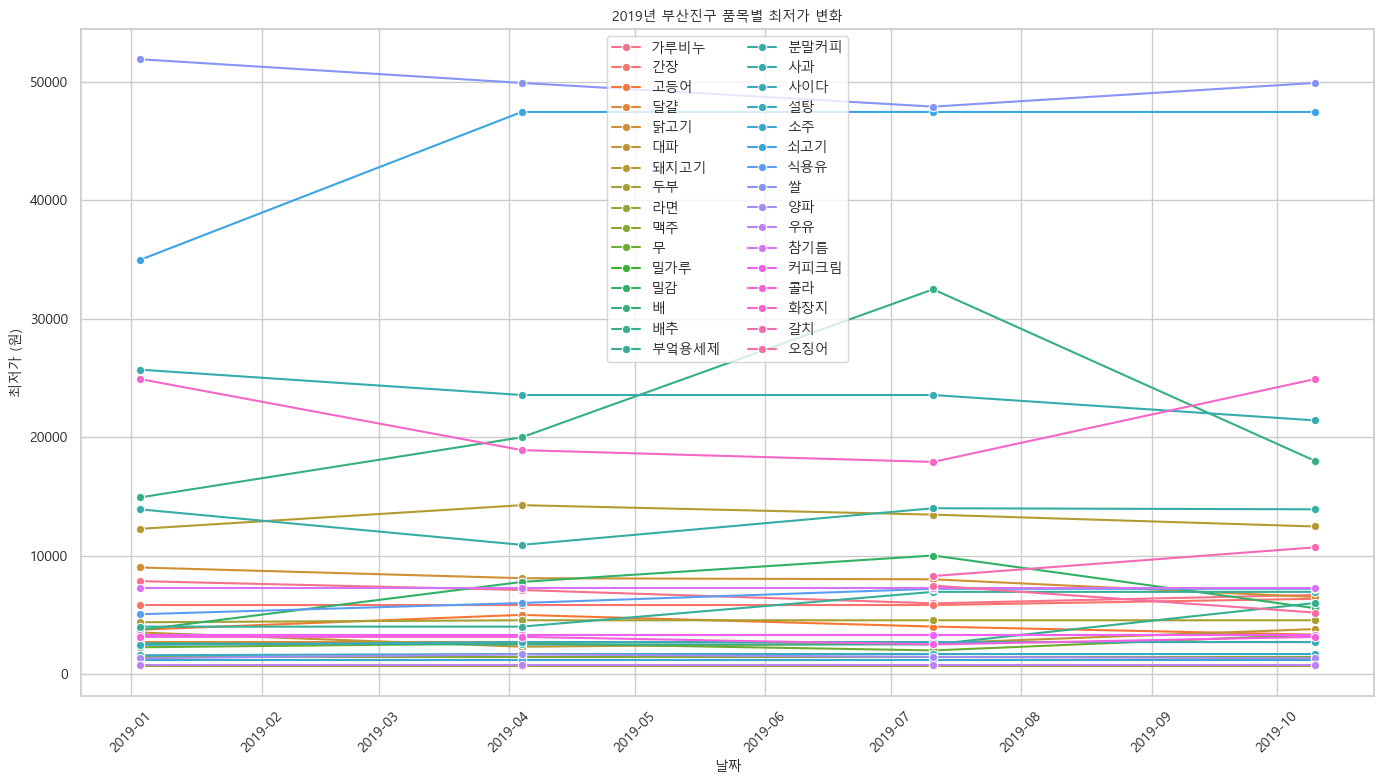

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2019_1q.csv")
q2 = pd.read_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2019_2q.csv")
q3 = pd.read_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2019_3q.csv")
q4 = pd.read_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2019_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÏ†ÄÍ∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2019ÎÖÑ Î∂ÄÏÇ∞ÏßÑÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÏ†ÄÍ∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÏ†ÄÍ∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2019_min.csv", index=False, encoding="utf-8-sig")

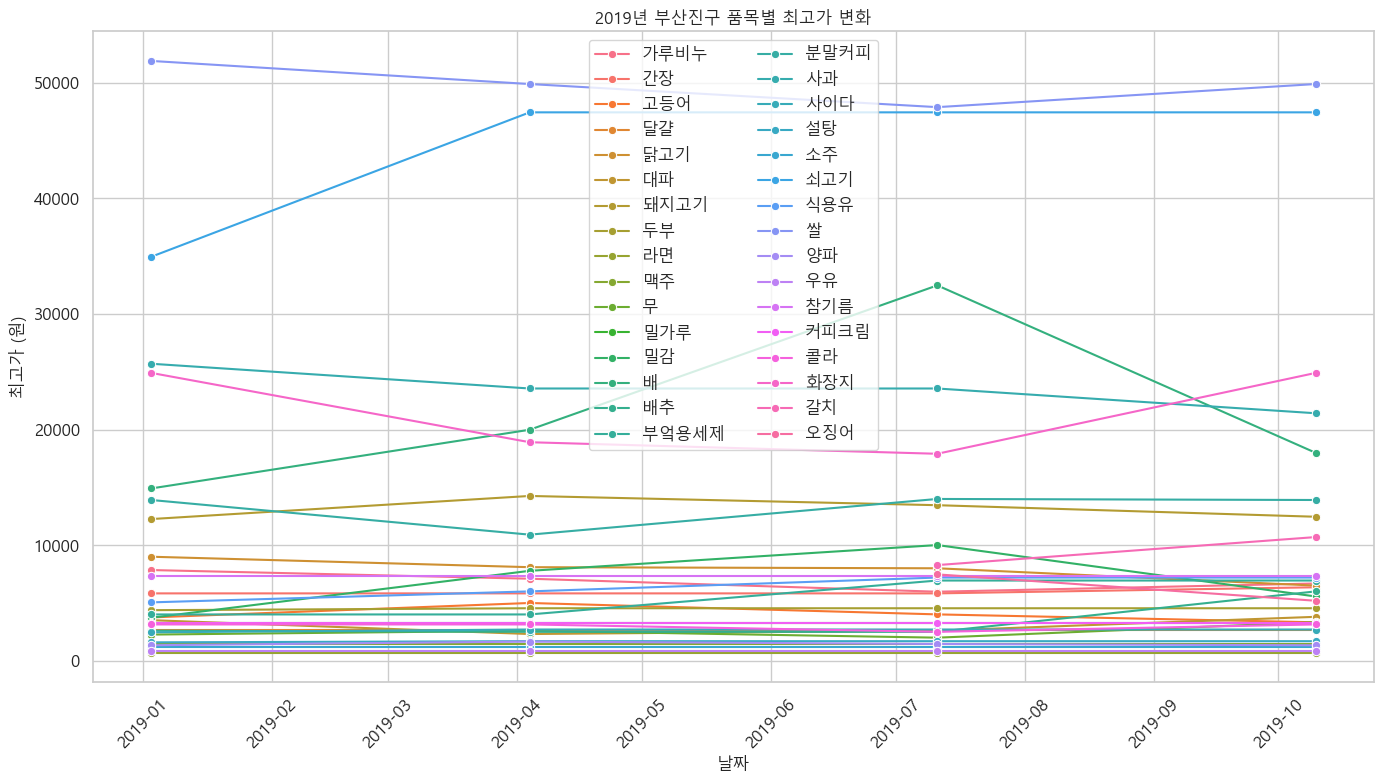

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2019_1q.csv")
q2 = pd.read_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2019_2q.csv")
q3 = pd.read_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2019_3q.csv")
q4 = pd.read_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2019_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÍ≥†Í∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2019ÎÖÑ Î∂ÄÏÇ∞ÏßÑÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÍ≥†Í∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÍ≥†Í∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("Î∂ÄÏÇ∞ÏßÑÍµ¨2019_max.csv", index=False, encoding="utf-8-sig")